In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.pyplot import rcParams
import warnings
warnings.filterwarnings('ignore')

import re
import jax.numpy as jnp
from jax import grad, jit, partial
import ticktack
from ticktack import fitting
from astropy.table import Table
from tqdm import tqdm
import scipy
import jax

rcParams['figure.figsize'] = (10.0, 5.0)

In [2]:
cbm = ticktack.load_presaved_model('Guttler14', production_rate_units = 'atoms/cm^2/s')
cf = fitting.CarbonFitter(cbm)
cf.load_data('400_BCE_Data_processed.csv', time_oversample=50)
cf.prepare_function(use_control_points=True, interp="gp")

In [3]:
%%time
soln = cf.fit_cp(low_bound=0.)

CPU times: user 9min 40s, sys: 31.2 ms, total: 9min 40s
Wall time: 9min 40s


In [4]:
print("total likelihood: ", cf.gp_likelihood(soln.x))
print("gp likelihood: ", cf.gp_neg_log_likelihood(soln.x))
print("chi2: ", cf.loss_chi2(soln.x))

total likelihood:  113.9491938331666
gp likelihood:  109.2829611410148
chi2:  4.666232692151815


In [5]:
soln.message

'STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT'

In [6]:
soln.x

array([1.87950621, 2.05548316, 2.16896865, 2.12326492, 1.92765218,
       1.67870017, 1.48700325, 1.37375858, 1.3359046 , 1.3898802 ,
       1.57105116, 1.89760155, 2.29110968, 2.50613956, 2.30867495,
       2.01320503, 2.08400432, 2.20240843, 1.99356716, 1.85912309,
       2.34768742, 2.48725444, 2.14537467, 1.85018462, 1.90678008,
       1.8729083 , 1.85585278, 1.92954552, 2.14648343, 2.54665067,
       2.30018841, 1.88012118, 2.01963757, 2.36881629, 2.57134761,
       2.54339131, 2.31885345, 2.03005618, 1.85378128, 1.83874783,
       1.94667364, 2.09753971, 2.18987685, 2.19219858, 2.11408054,
       2.00335614, 1.9141844 , 1.86600566, 1.86257586, 1.9208109 ,
       2.05876252, 2.2587729 , 2.42261601, 2.43971312, 2.38573016,
       2.42929712, 2.52946281, 2.51294919, 2.30384767, 1.97067859,
       1.76978851, 1.98407439, 2.42388267, 2.63427856, 2.55988459,
       2.40904611, 2.23940138, 2.00251196, 1.77988569, 1.73216462,
       1.87393908, 2.10961554, 2.36958727, 2.5984251 , 2.71246

In [7]:
cf.gp_likelihood(soln.x)

DeviceArray(113.94919383, dtype=float64)

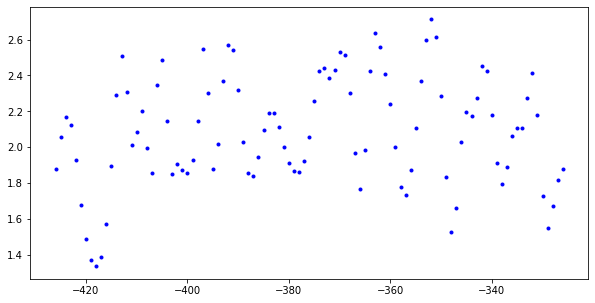

In [8]:
plt.plot(cf.control_points_time, soln.x, ".b")

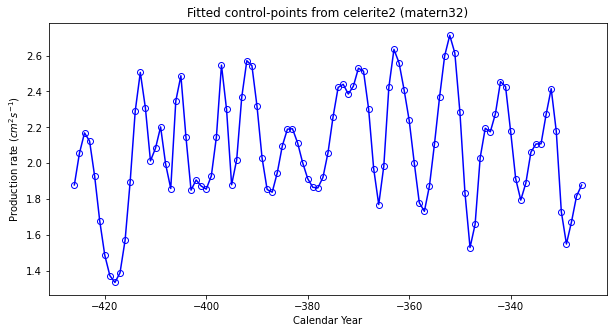

In [9]:
plt.plot(cf.control_points_time, soln.x, "ob", fillstyle="none")
plt.plot(cf.control_points_time, soln.x, "b")
plt.ylabel("Production rate ($cm^2s^{-1}$)");
plt.xlabel("Calendar Year");
plt.title(r"Fitted control-points from celerite2 (matern32)");

In [10]:
fine = cf.dc14_fine(params=soln.x)
coarse = cf.dc14(params=soln.x)

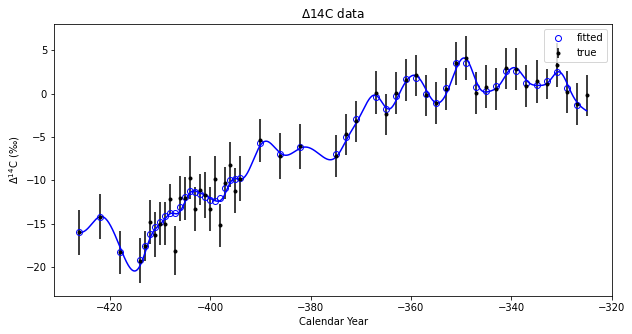

In [11]:
plt.plot(cf.time_grid_fine, fine, "b")
plt.plot(cf.time_data[:-1], coarse, "ob", fillstyle="none", label="fitted")
plt.errorbar(cf.time_data, cf.d14c_data, yerr=cf.d14c_data_error, fmt=".k", label="true")
plt.legend()
plt.ylabel("$\Delta^{14}$C (‰)")
plt.xlabel("Calendar Year");
plt.title("$\Delta$14C data");

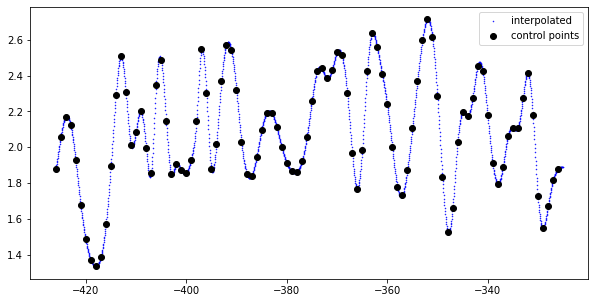

In [12]:
out = cf.production(cf.time_grid_fine, soln.x)
plt.plot(cf.time_grid_fine, out, ".b", markersize=1, label="interpolated")
plt.plot(cf.control_points_time, soln.x, "ok", label='control points')
plt.legend()